In [145]:
import torch
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/task36/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\MILAN/.cache\torch\hub\master.zip
YOLOv5  2024-8-29 Python-3.10.7 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [146]:
torch.cuda.is_available()


False

In [147]:
import os,cv2
img =os.path.join('dataset','images','train','feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.jpg')
img4 =os.path.join('dataset','chips package1.png')
img10 =os.path.join('abc.png')
img5 = os.path.join('dataset','pexels-eberhardgross-16244381.jpg')
img6 = os.path.join('dataset','pexels-eberhardgross-1624438.jpg')


#print(cv2.imread(img1))

In [16]:
#cv2.resize(img,(192,))

In [148]:
import  time
#from datetime import time
#milsec = int(round(time.time() * 1000))
#print(time.time())
start_time = int(round(time.time() * 1000))
#print(int(round(time.time() * 1000)))
results = model(img10)
end_time = int(round(time.time() * 1000))
execution_time = end_time - start_time
print(execution_time)

423


In [149]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,84.982498,311.010956,130.779037,415.578674,0.833313,3,scratch
1,381.193115,60.118431,443.941467,114.874054,0.488922,1,line
2,330.040405,250.117477,356.241211,301.275726,0.334472,2,spot
3,145.476135,185.411819,221.510178,280.818390,0.292916,3,scratch


In [150]:
print(results)

image 1/1: 500x500 1 line, 1 spot, 2 scratchs
Speed: 36.2ms pre-process, 366.4ms inference, 17.3ms NMS per image at shape (1, 3, 640, 640)


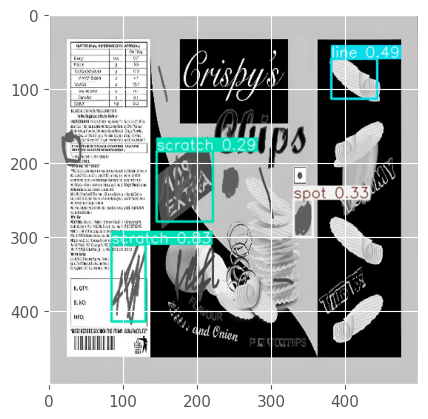

In [151]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline   
plt.imshow(np.squeeze(results.render()))
plt.show()

In [155]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #print(frame.shape)
    # Make detections 
    results = model(frame)
    #cv2.imshow('frame',frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
!python detect.py --source  C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/images/train/feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.jpg  --weights  runs/train/task36/weights/best.pt

detect: weights=['runs/train/task36/weights/best.pt'], source=C:/Users/MILAN/Desktop/tfpro/machine_learning_projects/scratch_detection5/dataset/images/train/feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-347-gd6112173 Python-3.10.7 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5\dataset\images\train\feathering.e5bf94a4-4ef5-11ef-b6f0-f889d2872452.jpg: 384x640 3 featherings, 541.1ms
Speed: 5.0ms pre-process, 541.1ms infe

In [15]:
cd ..


C:\Users\MILAN\Desktop\tfpro\machine_learning_projects\scratch_detection5


In [ ]:
import cv2
import time
cap = cv2.VideoCapture(0)
sample_image_1 = os.path.join('dataset','chips package1.png')

# Let's load a simple image with 3 black squares 
sample_image = cv2.imread(img)
print(time.time()/1000)
while cap.isOpened():
    ret, frame = cap.read()    
    if frame.all() == sample_image.all():
    #if not frame.any():
        pass
    else:  
        frame = cv2.resize(frame,(1920,1080))
        diff = cv2.absdiff(sample_image,frame)
        mask = cv2.cvtColor( diff, cv2.COLOR_BGR2GRAY)
        th = 190
        imask =  mask>th
        canvas = np.zeros_like(frame, np.uint8)
       # print(canvas.shape)
        
        iimask = diff > th
       # print(iimask.shape)
        canvas[iimask] = frame[iimask]
        
        edged = cv2.Canny(mask, 30, 200) 
        contours, hierarchy = cv2.findContours(edged, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

        for contour in contours:
            # Compute the bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
    
            # Draw the rectangle on the image
            area = cv2.contourArea(contour)
           
            if area > 250:
                #print(area)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)   
        # Make detections 
        results = model(canvas)
       
        cv2.imshow('Contours', cv2.resize(frame,(500,500)))      
        
        cv2.imshow('YOLO', cv2.resize(np.squeeze(results.render()),(500,500)))
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1724244.833941148


In [18]:
cap.release()

In [24]:
        sample_image_1 = os.path.join('dataset','chips package1.png')
        # Let's load a simple image with 3 black squares 
        sample_image = cv2.imread(img)
        second_i = cv2.imread(img4)
        print(second_i)
    
        diff = cv2.absdiff(sample_image,second_i)
        mask = cv2.cvtColor( diff, cv2.COLOR_BGR2GRAY)
        th = 20
        imask =  mask>th
        canvas = np.zeros_like(sample_image, np.uint8)
        #print(canvas)
        canvas[imask] = second_i[imask]
        canvas1 =canvas.copy()
        edged = cv2.Canny(mask, 30, 200) 
        contours, hierarchy = cv2.findContours(edged, 
            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

        for contour in contours:
            # Compute the bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
    
            # Draw the rectangle on the image            
            area = cv2.contourArea(contour)
           
            if area > 250:
                print(area)
                cv2.rectangle(canvas, (x, y), (x + w, y + h), (0, 255, 0), 2)
            

        # Make detections 
        results = model(canvas1)
       
        cv2.imshow('Contours', cv2.resize(canvas,(500,500)))
        cv2.waitKey(0)
        
        cv2.imshow('YOLO', cv2.resize(np.squeeze(results.render()),(500,500)))
    
        cv2.waitKey(0)
        
        #cap.release()
        cv2.destroyAllWindows()

[[[ 59  75  85]
  [ 58  75  84]
  [ 58  75  84]
  ...
  [ 58  75  87]
  [ 58  75  87]
  [ 59  76  87]]

 [[ 58  75  84]
  [ 57  74  83]
  [ 57  74  83]
  ...
  [ 58  75  86]
  [ 58  75  86]
  [ 59  76  88]]

 [[ 61  72  80]
  [ 59  70  78]
  [ 59  70  78]
  ...
  [ 61  75  83]
  [ 61  75  83]
  [ 62  76  84]]

 ...

 [[124 198 218]
  [124 198 218]
  [124 198 218]
  ...
  [120 197 221]
  [120 197 221]
  [120 197 221]]

 [[122 198 218]
  [122 198 218]
  [122 198 218]
  ...
  [127 196 220]
  [127 196 220]
  [126 196 220]]

 [[123 199 219]
  [123 199 219]
  [123 199 219]
  ...
  [127 197 221]
  [127 197 221]
  [127 197 221]]]
455.0
638.0
454.0
802.0
450.5
1069.0
648.0
489.0
482.5
397.0
364.5
303.5
6733.5
342.5
1697.0
5928.0
752.5
851.0
540.5
409.5
3796.0
8357.0
714.5
427.5
344.0
1141.5
411.0
1613.0


In [61]:
import cv2
import numpy as np
import time

start = time.time()
img1 = cv2.imread(img)  # selecting first image for comparison
img2 = cv2.imread(img4) # same selecting second
diff = cv2.absdiff(img1, img2) # for finding absoluate diffrence
print("{},{}".format(diff.shape,img1.shape))
#print(diff)
start1 = time.time()
if img1.all() == img2.all():
    print("T")
else:
    print("F")
end1 = time.time()
print("compare:{}".format(end1-start1))
mask = cv2.cvtColor( diff, cv2.COLOR_BGR2GRAY)

print(mask)
th = 100
imask =  mask>th
print(imask)

canvas = np.zeros_like(img2, np.uint8)
print(canvas)
canvas[imask] = img1[imask]



cv2.imwrite("result11.png", canvas)
end = time.time()

time_taken = end - start
print(time_taken)

(1080, 1920, 3),(1080, 1920, 3)
T
compare:0.03438425064086914
[[1 2 2 ... 3 4 4]
 [1 1 5 ... 2 4 3]
 [2 2 2 ... 3 1 2]
 ...
 [1 1 1 ... 2 3 3]
 [2 2 2 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
0.24642109870910645


In [47]:
# Apply binary thresholding
#_, binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

In [49]:
# Apply Canny edge detection
#binary = cv2.Canny(mask, 3648, 5412)
#print(binary)

In [46]:
# Find contours
#contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(contours)

In [45]:
#cv2.drawContours(mask, contours, -1, (0, 0, 255), 3)  # 

In [2]:
import cv2 
import numpy as np 
image = os.path.join('dataset','chips package1.png')
# Let's load a simple image with 3 black squares 
image = cv2.imread(img10) 
cv2.waitKey(0) 
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged, 
	cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', cv2.resize(edged,(500,500))) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours))) 

# Draw all contours 
# -1 signifies drawing all contours 
print(contours)
cv2.drawContours(image, contours, -1, (0, 255, 0), 1) 

cv2.imshow('Contours', cv2.resize(image,(500,500))) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


Number of Contours found = 415
(array([[[1307, 1001]],

       [[1307, 1002]],

       [[1307, 1003]],

       [[1308, 1003]],

       [[1309, 1003]],

       [[1310, 1003]],

       [[1311, 1003]],

       [[1312, 1003]],

       [[1313, 1003]],

       [[1314, 1003]],

       [[1314, 1002]],

       [[1314, 1001]],

       [[1313, 1001]],

       [[1312, 1001]],

       [[1311, 1001]],

       [[1310, 1001]],

       [[1309, 1001]],

       [[1308, 1001]]], dtype=int32), array([[[1218, 1001]],

       [[1217, 1002]],

       [[1218, 1003]],

       [[1219, 1003]],

       [[1220, 1003]],

       [[1221, 1003]],

       [[1222, 1003]],

       [[1223, 1003]],

       [[1224, 1003]],

       [[1225, 1003]],

       [[1226, 1003]],

       [[1227, 1003]],

       [[1228, 1003]],

       [[1229, 1003]],

       [[1230, 1003]],

       [[1231, 1003]],

       [[1232, 1003]],

       [[1233, 1003]],

       [[1234, 1003]],

       [[1235, 1003]],

       [[1236, 1003]],

       [[1237, 100

In [7]:
c =cv2.resize(gray,(500,500))
cv2.imwrite('abc.png',c)
cv2.imshow('diff', c)
key =cv2.waitKey(0)
# if ESC is pressed, exit loop
if key == 27:
    cv2.destroyAllWindows()

In [12]:
from skimage.metrics import structural_similarity
import cv2

# Load images as grayscale
image1 = cv2.imread(img, 0)
image2 = cv2.imread(img5, 0)

# Compute SSIM between the two images
(score, diff) = structural_similarity(image1, image2, full=True)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] image1 we can use it with OpenCV
diff = (diff * 255).astype("uint8")
print("Image Similarity: {:.4f}%".format(score * 100))

cv2.imshow('diff', diff)
if cv2.waitKey(10) & 0xFF == ord('q'):
        break

ModuleNotFoundError: No module named 'skimage'

In [26]:
import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
data = sns.load_dataset('iris')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.8 KB


In [28]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [29]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [31]:
data['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [32]:
data = data[data['species']!= 'setosa']

In [37]:
data['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [42]:
data['species'] = data['species'].map({'versicolor':0,'virginica':1})

In [45]:
len(data)

100

In [44]:
data['species'].unique()

array([0, 1], dtype=int64)

In [47]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [77]:
X = data.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [100]:
y = data.iloc[:,-1]

In [101]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [102]:
from sklearn.model_selection  import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
X_train.shape

(80, 4)

In [104]:
y_test.shape

(20,)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
classifier  = LogisticRegression()

In [107]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty': ['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50],'max_iter':[100,200,300] }

In [108]:
classifier_regression = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [109]:
classifier_regression.fit(X_train,y_train)

C:\Users\MILAN\Desktop\tfpro\tfvenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MILAN\Desktop\tfpro\tfvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MILAN\Desktop\tfpro\tfvenv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\MILAN\Desktop\tfpro\tfvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _che

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [113]:
print(classifier_regression.best_params_)

{'C': 6, 'max_iter': 100, 'penalty': 'l2'}


In [114]:
classifier_regression.best_score_

0.9875

In [115]:
y_pred = classifier_regression.predict(X_test)

In [116]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [126]:
y_test == y_pred

133     True
103     True
120     True
95      True
94      True
89      True
72     False
130     True
60      True
50      True
68      True
80      True
123     True
83     False
140     True
54      True
126     True
127     True
62      True
81      True
Name: species, dtype: bool

In [129]:
from sklearn.metrics  import accuracy_score,classification_report


In [130]:
score = accuracy_score(y_pred,y_test)

In [131]:
score

0.9

In [132]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



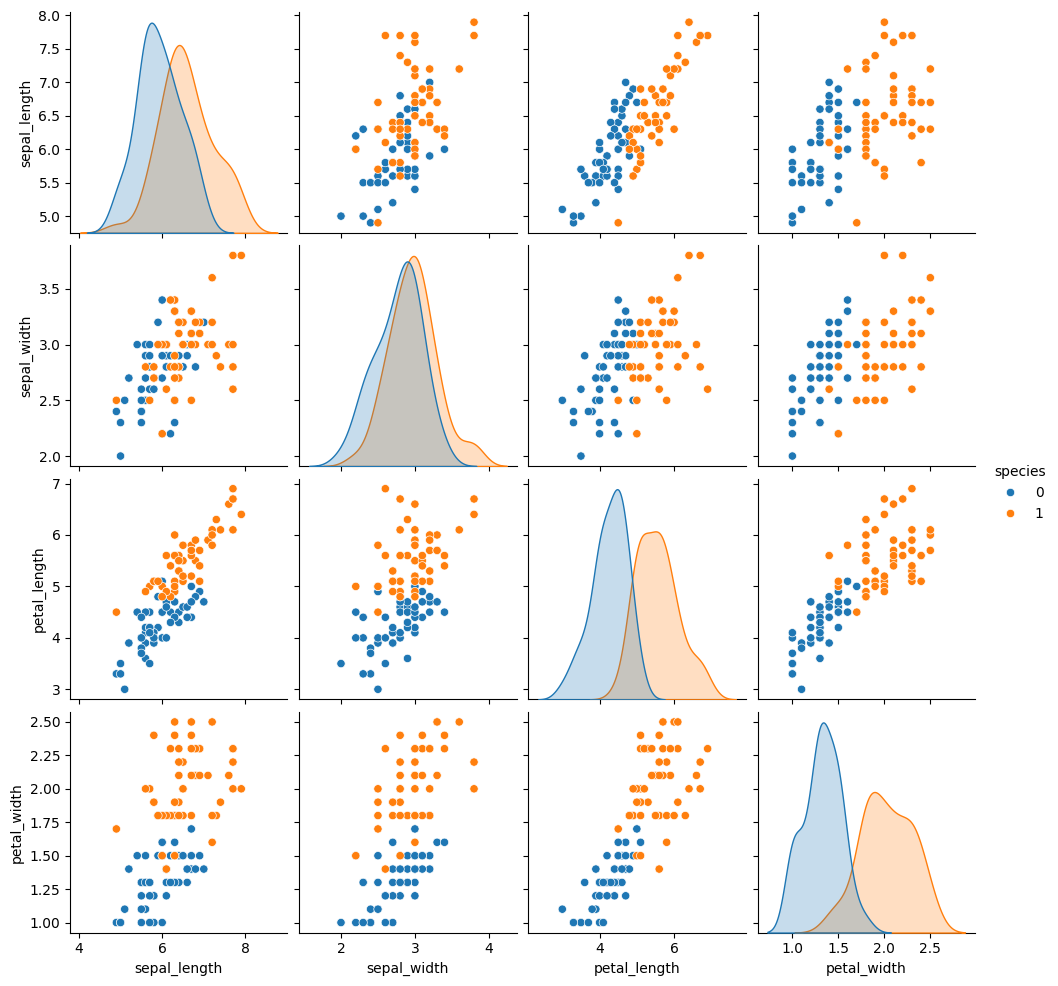

In [134]:
sns.pairplot(data,hue='species')

In [135]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


In [140]:
import matplotlib.pyplot  as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [142]:
car = pd.read_csv('quikr_car.csv')

In [143]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


pandas.core.frame.DataFrame